In [1]:
import pandas as pd
import numpy as np

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# df_X = pd.read_csv('/content/drive/MyDrive/Pemrosesan Teks/Data_Crypto_X.csv')
# df_yt = pd.read_csv('/content/drive/MyDrive/Pemrosesan Teks/Data_Crypto_Youtube.csv')

In [4]:
# df_X = df_X.drop(columns= ['Unnamed: 0', 'username', 'likes', 'retweets'])
# df_yt = df_yt.drop(columns = ['video_id', 'video_title', 'penulis', 'jumlah_like', 'Column 1'])

In [5]:
# df_yt

In [6]:
# df_yt = df_yt.rename(columns={'tanggal_publish': 'created_at', 'teks_komentar_cleaned': 'text'})
# print(df_yt.head())

In [7]:
# df_X

In [8]:
# df_yt['Socmed'] = 'Youtube'
# df_X['Socmed'] = 'X'

In [9]:
# df = pd.concat([df_X, df_yt], ignore_index=True)
# df

In [10]:
# df['month'].value_counts()

In [11]:
# df.to_csv("dataset_scrapping_X_YT.csv")
# print("sudah tersimpan")

In [12]:
df = pd.read_csv('/content/Data Scrapping (After Preprocessing)_LABELLING - Sheet1.csv')
df.head()

,Unnamed: 0,username,text,created_at,sumber,sentiment
0,0,anggi toXinc,rungkad mulu di kripto karena takut ketinggala...,Wed Jan 29 14:49:37 +0000 2025,X,negative
1,1,Sinau â‚¿itcoin ðŸ§¡,wis menang lur kenapa isih do denial sih bitco...,Wed Jan 29 12:24:13 +0000 2025,X,positive
2,2,MunchMunch.base.eth ðŸ’™,yang saya lihat dari kemarin chart beberapa ko...,Wed Jan 29 12:09:50 +0000 2025,X,netral
3,3,FLOKI,saham us harga turun buruk yakali market kript...,Wed Jan 29 10:52:13 +0000 2025,X,negative
4,5,Ariela,ada apa dengan market kripto lesu banget nge t...,Wed Jan 29 04:35:58 +0000 2025,X,negative


In [13]:
def parse_date(date_str):
    if pd.isna(date_str):
        return None
    try:
        return pd.to_datetime(date_str, format='%a %b %d %H:%M:%S %z %Y', errors='raise')
    except ValueError:
        try:
            return pd.to_datetime(date_str, format='%Y-%m-%dT%H:%M:%SZ', errors='raise')
        except ValueError:
            return None

df['created_at'] = df['created_at'].apply(parse_date)
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce') # Ensure the column is datetime type
df['month'] = df['created_at'].dt.month

df.head()

,Unnamed: 0,username,text,created_at,sumber,sentiment,month
0,0,anggi toXinc,rungkad mulu di kripto karena takut ketinggala...,2025-01-29 14:49:37+00:00,X,negative,1.0
1,1,Sinau â‚¿itcoin ðŸ§¡,wis menang lur kenapa isih do denial sih bitco...,2025-01-29 12:24:13+00:00,X,positive,1.0
2,2,MunchMunch.base.eth ðŸ’™,yang saya lihat dari kemarin chart beberapa ko...,2025-01-29 12:09:50+00:00,X,netral,1.0
3,3,FLOKI,saham us harga turun buruk yakali market kript...,2025-01-29 10:52:13+00:00,X,negative,1.0
4,5,Ariela,ada apa dengan market kripto lesu banget nge t...,2025-01-29 04:35:58+00:00,X,negative,1.0


In [14]:
df['month'].value_counts()

,count
month,
6.0,292
7.0,234
2.0,227
4.0,216
10.0,206
11.0,196
8.0,179
3.0,170
1.0,149


### **PISAHKAN DATAA LABEL DAN UNLABELLED**

In [15]:
# df_labeled = df[df['sentiment'].notna()].copy()
# df_unlabeled = df[df['sentiment'].isna()].copy()

# print(f"Total Data: {len(df)}")
# print(f"Data Siap Latih (Labeled): {len(df_labeled)}")
# print(f"Data Untuk Insight (Unlabeled): {len(df_unlabeled)}")

### **PISAHKAN DATA TRAIN DAN DATA TEST**

In [16]:
from os import XATTR_CREATE
from sklearn.model_selection import train_test_split

label_mapping = {
    'netral': 0,
    'positive': 1,
    'negative': 2
}

df['label_code'] = df['sentiment'].map(label_mapping)

X_train, X_test, y_train, y_test = train_test_split(
    df['text'],
    df['label_code'],
    test_size = 0.2,
    random_state = 42,
    stratify = df['label_code']
)

In [17]:
y_train

,label_code
6377,1
3644,0
6682,1
3207,0
601,0
...,...
6879,0
3530,2
318,0
7332,0


In [18]:
from sentence_transformers import SentenceTransformer
!pip install transformers datasets accelerate evaluate

print("Memuat Model SBERT ---")
SBERT = SentenceTransformer('indobenchmark/indobert-base-p1')

print("Proses Embedding")
X_train_emb = SBERT.encode(X_train.tolist(), show_progress_bar = True)
X_test_emb = SBERT.encode(X_test.tolist(), show_progress_bar = True)

print(f"Shape X_train_vectors: {X_train_emb.shape}")
print(f"Shape X_test_vectors:  {X_test_emb.shape}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.5 MB/s eta 0:00:00
Memuat Model SBERT ---


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Proses Embedding


Batches:   0%|          | 0/187 [00:00<?, ?it/s]

Batches:   0%|          | 0/47 [00:00<?, ?it/s]

Shape X_train_vectors: (5968, 768)
Shape X_test_vectors:  (1493, 768)


In [19]:
import pickle

data_train = {
    'X_train': X_train_emb,
    'X_test': X_test_emb,
    'y_train': y_train,
    'y_test': y_test
}

with open('data_training_sbert.pkl', 'wb') as f:
    pickle.dump(data_train, f)

print("Data vektor berhasil disimpan ke 'data_training_sbert.pkl'")

Data vektor berhasil disimpan ke 'data_training_sbert.pkl'


## **TRAINING MODEL**

### **LOGICTIC REGRESSION**

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_logreg = LogisticRegression(
    multi_class = 'multinomial',
    solver = 'lbfgs',
    max_iter = 1000, #
    class_weight = 'balanced',
    random_state = 42
)

print("Lagi Fase Train")
model_logreg.fit(X_train_emb, y_train)

y_pred_logreg = model_logreg.predict(X_test_emb)

print("Classification Report")
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))

Lagi Fase Train


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report
              precision    recall  f1-score   support

           0       0.78      0.71      0.75       719
           1       0.70      0.73      0.72       376
           2       0.61      0.68      0.65       398

    accuracy                           0.71      1493
   macro avg       0.70      0.71      0.70      1493
weighted avg       0.72      0.71      0.71      1493

[[514  70 135]
 [ 66 274  36]
 [ 80  46 272]]


### **SUPPORT VECTOR MACHINE**

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

model_svm = SVC(
    kernel = 'rbf', #non linear
    C = 1.0, # Ketetatan
    class_weight = 'balanced', # menghukum jk ada salah prediksi pada label minoritas
    probability = True, #prediksi keyakinan suatu label
    random_state = 42,
    verbose = True #progress
)

print("Lagi Fase Train")
model_svm.fit(X_train_emb, y_train)

y_pred_svm = model_svm.predict(X_test_emb)

filename = 'model_svm_best_sbert.pkl'
with open(filename, 'wb') as f:
    pickle.dump(model_svm, f)

print("Classification Report")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

Lagi Fase Train
[LibSVM]Classification Report
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       719
           1       0.77      0.73      0.75       376
           2       0.62      0.74      0.67       398

    accuracy                           0.73      1493
   macro avg       0.73      0.73      0.73      1493
weighted avg       0.74      0.73      0.74      1493

[[527  57 135]
 [ 58 275  43]
 [ 78  27 293]]


In [22]:
from sklearn.ensemble import VotingClassifier

# Siapkan model (jangan di-fit dulu)
clf1 = LogisticRegression(multi_class='multinomial', class_weight='balanced', max_iter=1000, random_state=42)
clf2 = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)

# Buat Voting Classifier (Soft Voting = Berdasarkan rata-rata probabilitas)
voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('svm', clf2)],
    voting='soft'
)

# Latih 'Tim Juri' ini
voting_clf.fit(X_train_emb, y_train)

# Evaluasi
y_pred_vot = voting_clf.predict(X_test_emb)

print("Classification Report")
print(classification_report(y_test, y_pred_vot))
print(confusion_matrix(y_test, y_pred_vot))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       719
           1       0.75      0.73      0.74       376
           2       0.63      0.67      0.65       398

    accuracy                           0.73      1493
   macro avg       0.72      0.72      0.72      1493
weighted avg       0.73      0.73      0.73      1493

[[549  54 116]
 [ 63 276  37]
 [ 94  39 265]]


In [23]:
# df_labeled.head()

In [24]:
# print(f"Jumlah data yang akan diprediksi: {len(df)}")

# print("Sedang melakukan embedding SBERT pada data u...")
# X_emb = SBERT.encode(df['text'].tolist(), show_progress_bar=True)

# print("Sedang memprediksi sentimen...")
# prediksi_label = model_svm.predict(X_emb)

# prediksi_proba = model_svm.predict_proba(X_emb)
# confidence_score = prediksi_proba.max(axis=1)

# df['prediksi_label'] = prediksi_label
# df['confidence'] = confidence_score

# label_map = {0: 'netral', 1: 'positive', 2: 'negative'}
# df['sentimen'] = df['prediksi_label'].map(label_map)

# df['sumber_label'] = 'Manual'
# df['sumber_label'] = 'Prediksi model'

# df_final_dashboard = pd.concat([df, df], ignore_index=True)

# df_final_dashboard

In [88]:
len(df)

7461

In [58]:
df_final_dashboard = df.copy()

stopwords_id = set([
    "yang", "di", "dan", "ini", "itu", "dari", "ke", "akan", "pada", "juga",
    "saya", "aku", "gue", "gw", "kamu", "lu", "lo", "dia", "mereka", "kita",
    "karena", "untuk", "bisa", "ada", "adalah", "dengan", "dalam", "atau",
    "sudah", "tapi", "telah", "maka", "bagaimana", "apa", "kenapa", "saja",
    "ya", "yuk", "mari", "deh", "kan", "kok", "sih", "dong", "aja", "gak", "tidak",

    "tears", "joy", "face", "with", "smiling", "eyes", "rolling", "floor", "laughing",
    "loudly", "hands", "clapping", "thumbs", "up", "down", "fire", "rocket",
    "mark", "check", "button", "folded", "red", "heart", "tears of joy",
    "party", "popper", "tears", "joy", "face", "with", "smiling", "eyes",
    "rolling", "floor", "laughing", "loudly", "crying", "hands", "clapping",
    "thumbs", "up", "down", "fire", "rocket", "mark", "check", "button", "folded",
    "red", "heart", "gem", "stone", "money", "bag", "chart", "increasing", "flexed", "biceps"

    "yg", "ga", "gak", "tidak", "mau", "akan", "bisa", "kalo", "kalau"
])

def remove_stopwords_for_viz(text):
    words = text.split()
    # Hanya ambil kata yang BUKAN stopword
    filtered_words = [word for word in words if word.lower() not in stopwords_id]
    return ' '.join(filtered_words)

df_final_dashboard['text_stopwords'] = df_final_dashboard['text'].apply(remove_stopwords_for_viz)

df_final_dashboard.to_csv('data_dashboard_final.csv', index=False)

Distribusi Sentimen:

sentiment
netral      3593
negative    1991
positive    1877
Name: count, dtype: int64


/tmp/ipython-input-577134816.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final_dashboard, x='sentiment', palette='viridis', order=df_final_dashboard['sentiment'].value_counts().index)


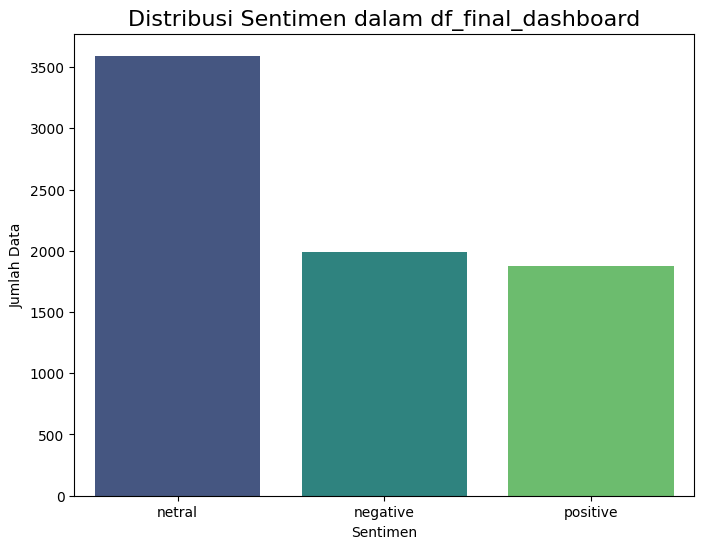

In [59]:
print("Distribusi Sentimen:\n")
print(df_final_dashboard['sentiment'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(data=df_final_dashboard, x='sentiment', palette='viridis', order=df_final_dashboard['sentiment'].value_counts().index)
plt.title('Distribusi Sentimen dalam df_final_dashboard', fontsize=16)
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Data')
plt.show()

#### **TRIGRAMS**

/tmp/ipython-input-3517025636.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(phrases), palette='viridis')


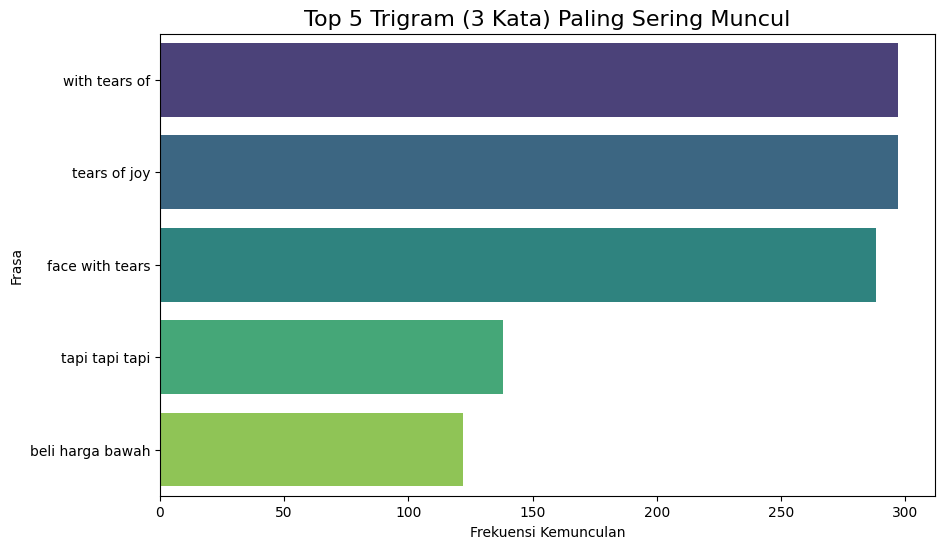

--- Top 5 Trigram ---
with tears of: 297
tears of joy: 297
face with tears: 288
tapi tapi tapi: 138
beli harga bawah: 122


In [60]:
def plot_top_ngrams(text_series, n=3, top_k=5):
    vec = CountVectorizer(ngram_range=(n, n)).fit(text_series.astype(str))

    bag_of_words = vec.transform(text_series.astype(str))

    sum_words = bag_of_words.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

    top_words = words_freq[:top_k]

    phrases, counts = zip(*top_words)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(phrases), palette='viridis')

    plt.title(f"Top {top_k} Trigram (3 Kata) Paling Sering Muncul", fontsize=16)
    plt.xlabel("Frekuensi Kemunculan")
    plt.ylabel("Frasa")
    plt.show()

    print(f"--- Top {top_k} Trigram ---")
    for phrase, count in top_words:
        print(f"{phrase}: {count}")

plot_top_ngrams(df_final_dashboard['text'], n=3, top_k=5)

/tmp/ipython-input-3065865073.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(phrases), palette='viridis')


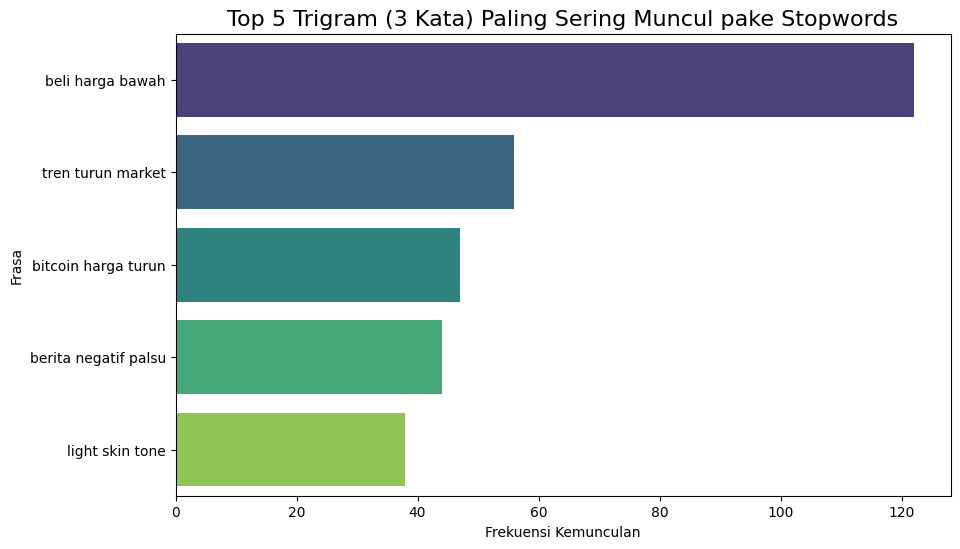

--- Top 5 Trigram ---
beli harga bawah: 122
tren turun market: 56
bitcoin harga turun: 47
berita negatif palsu: 44
light skin tone: 38


In [61]:
def plot_top_ngrams(text_series, n=3, top_k=5):
    vec = CountVectorizer(ngram_range=(n, n)).fit(text_series.astype(str))

    bag_of_words = vec.transform(text_series.astype(str))

    sum_words = bag_of_words.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

    top_words = words_freq[:top_k]

    phrases, counts = zip(*top_words)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(phrases), palette='viridis')

    plt.title(f"Top {top_k} Trigram (3 Kata) Paling Sering Muncul pake Stopwords", fontsize=16)
    plt.xlabel("Frekuensi Kemunculan")
    plt.ylabel("Frasa")
    plt.show()

    print(f"--- Top {top_k} Trigram ---")
    for phrase, count in top_words:
        print(f"{phrase}: {count}")

plot_top_ngrams(df_final_dashboard['text_stopwords'], n=3, top_k=5)

In [62]:
print("Persentase Distribusi Sentimen:\n")
print(df_final_dashboard['sentiment'].value_counts(normalize=True) * 100)

Persentase Distribusi Sentimen:

sentiment
netral      48.157084
negative    26.685431
positive    25.157486
Name: proportion, dtype: float64


In [63]:
print("\n--- Contoh Kalimat untuk Sentimen Netral ---")
neutral_examples = df_final_dashboard[df_final_dashboard['sentiment'] == 'netral']['text'].sample(10, random_state=42).tolist()
for i, text in enumerate(neutral_examples):
    print(f"{i+1}. {text}")

print("\n--- Contoh Kalimat untuk Sentimen Positive ---")
positive_examples = df_final_dashboard[df_final_dashboard['sentiment'] == 'positive']['text'].sample(10, random_state=42).tolist()
for i, text in enumerate(positive_examples):
    print(f"{i+1}. {text}")

print("\n--- Contoh Kalimat untuk Sentimen Negative ---")
negative_examples = df_final_dashboard[df_final_dashboard['sentiment'] == 'negative']['text'].sample(10, random_state=42).tolist()
for i, text in enumerate(negative_examples):
    print(f"{i+1}. {text}")


--- Contoh Kalimat untuk Sentimen Netral ---
1. dimana saya dapat cari indikatot pi cicle dan mvrv z score
2. uangnya ke mana menurutku ini lagi nunggu bitcoin dominance turun dan akan ijo royo royo tapi tidak akan lama sebelum harga turun lagi
3. abang untuk pengguna android aplikasi jangka panjang yang terbaik apa y abang
4. desember ada sedikit kenaikan januari turun tajam february turun ringan maret mulai merangkak pre tren naik run april juni peak nya itu kata chat gpt sih
5. harga turun mendadak ethereum bukan hanya soal panic sell funding rate dan volume negatif seringkali jadi alarm awal tersedia di bybit
6. kaka tolong di buatkan cara daftar n sampai deposito ke aplikasnya bitcoin
7. selalu sehat ya kenapa timothy dan kenapa kaka
8. sats token satoshi di brc representasi unit terkecil bitcoin volatile tapi sering takut ketinggalan
9. saya day trader mudah saja kalau tahu caranya untuk trade kripto
10. bitcoin sebagai store of value tidak haram semoga prabowo dapat menjadikan 

In [64]:
print("\n--- Contoh Kalimat untuk Sentimen Netral ---")
neutral_examples = df_final_dashboard[df_final_dashboard['sentiment'] == 'netral']['text_stopwords'].sample(10, random_state=42).tolist()
for i, text in enumerate(neutral_examples):
    print(f"{i+1}. {text}")

print("\n--- Contoh Kalimat untuk Sentimen Positive ---")
positive_examples = df_final_dashboard[df_final_dashboard['sentiment'] == 'positive']['text_stopwords'].sample(10, random_state=42).tolist()
for i, text in enumerate(positive_examples):
    print(f"{i+1}. {text}")

print("\n--- Contoh Kalimat untuk Sentimen Negative ---")
negative_examples = df_final_dashboard[df_final_dashboard['sentiment'] == 'negative']['text_stopwords'].sample(10, random_state=42).tolist()
for i, text in enumerate(negative_examples):
    print(f"{i+1}. {text}")


--- Contoh Kalimat untuk Sentimen Netral ---
1. dimana dapat cari indikatot pi cicle mvrv z score
2. uangnya mana menurutku lagi nunggu bitcoin dominance turun ijo royo royo lama sebelum harga turun lagi
3. abang pengguna android aplikasi jangka panjang terbaik y abang
4. desember sedikit kenaikan januari turun tajam february turun ringan maret mulai merangkak pre tren naik run april juni peak nya kata chat gpt
5. harga turun mendadak ethereum bukan hanya soal panic sell funding rate volume negatif seringkali jadi alarm awal tersedia bybit
6. kaka tolong buatkan cara daftar n sampai deposito aplikasnya bitcoin
7. selalu sehat timothy kaka
8. sats token satoshi brc representasi unit terkecil bitcoin volatile sering takut ketinggalan
9. day trader mudah tahu caranya trade kripto
10. bitcoin sebagai store of value haram semoga prabowo dapat menjadikan bitcoin sebagai reserve apbn

--- Contoh Kalimat untuk Sentimen Positive ---
1. tang tang anak gym beneran berani of of of
2. buy bitcoin 

### **WORDCLOUD**

In [65]:
!pip install wordcloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns



Total data with neutral sentiment: 3593


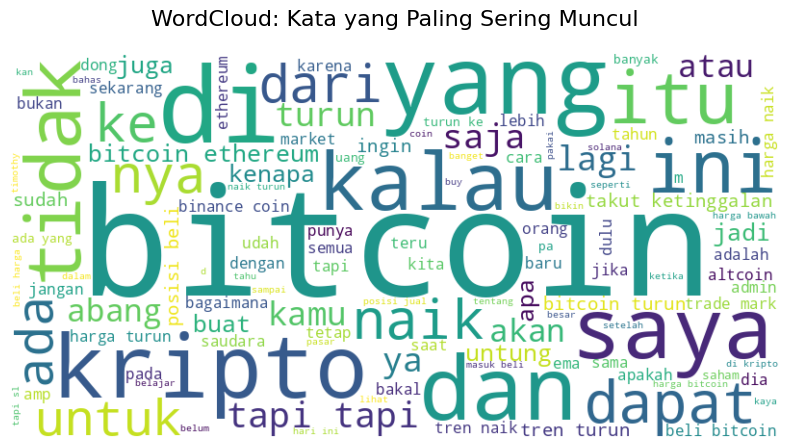

In [66]:
df_neutral = df_final_dashboard[df_final_dashboard['sentiment'] == 'netral']

print(f"Total data with neutral sentiment: {len(df_neutral)}")

plot_wordcloud(df_neutral['text'])

Total data with positive sentiment: 1877


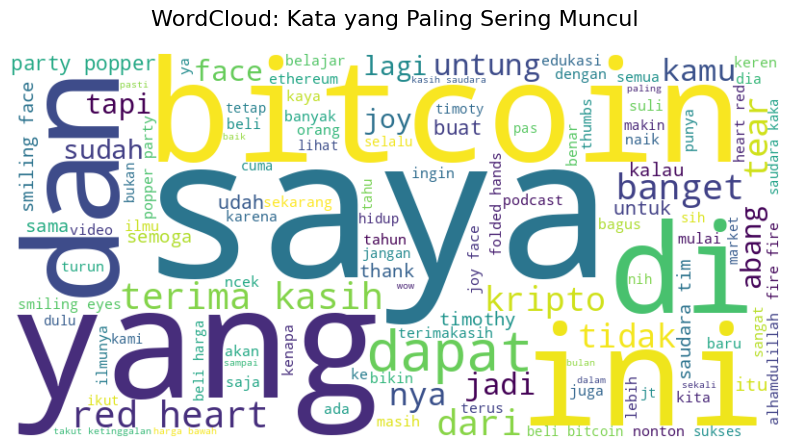

In [67]:
df_positive = df_final_dashboard[df_final_dashboard['sentiment'] == 'positive']

print(f"Total data with positive sentiment: {len(df_positive)}")

plot_wordcloud(df_positive['text'])

Total data with negative sentiment: 1991


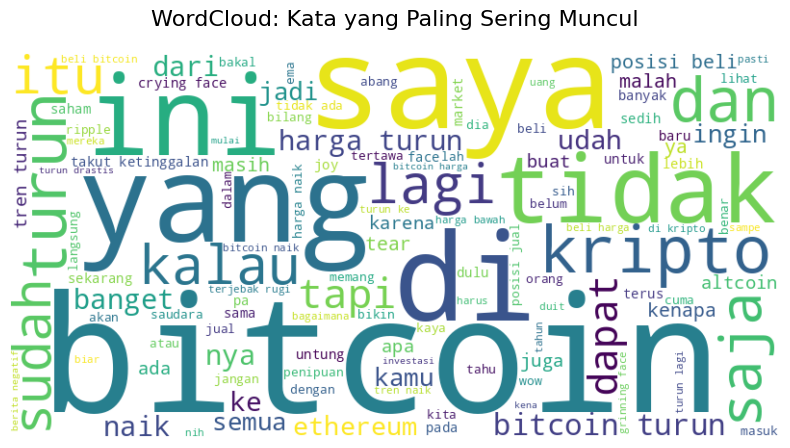

In [68]:
df_negative = df_final_dashboard[df_final_dashboard['sentiment'] == 'negative']

print(f"Total data with negative sentiment: {len(df_negative)}")

plot_wordcloud(df_negative['text'])


--- Word Cloud untuk Sentimen Netral (Tanpa Stopwords) ---


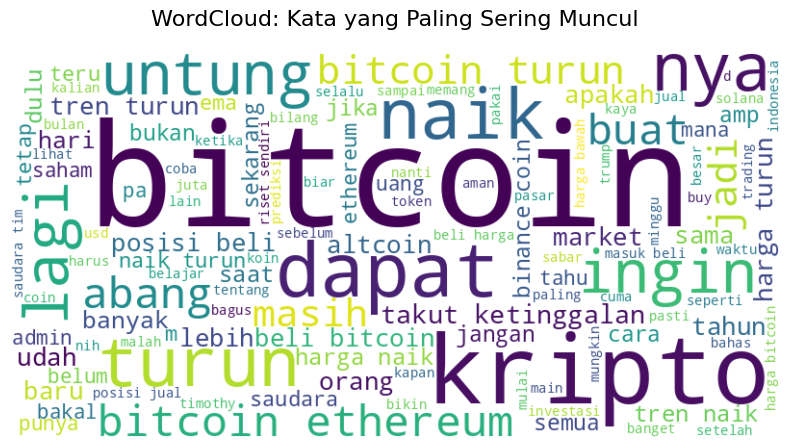


--- Word Cloud untuk Sentimen Positive (Tanpa Stopwords) ---


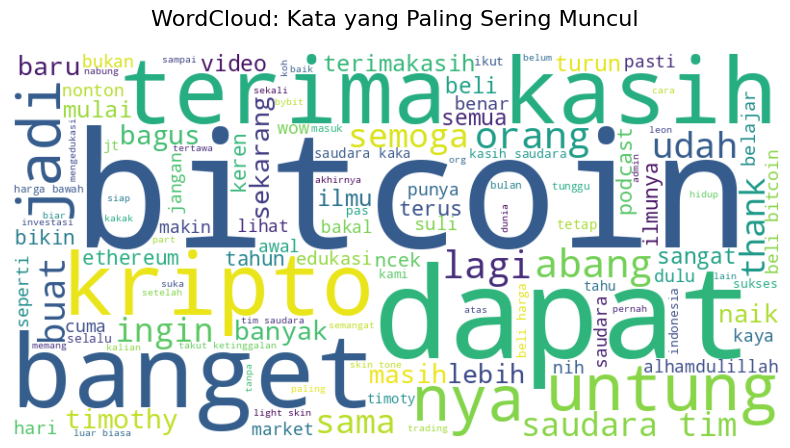


--- Word Cloud untuk Sentimen Negative (Tanpa Stopwords) ---


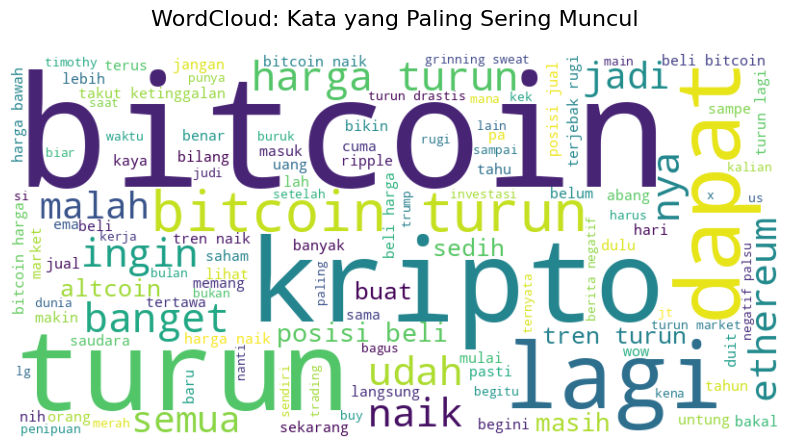

In [69]:
print("\n--- Word Cloud untuk Sentimen Netral (Tanpa Stopwords) ---")
plot_wordcloud(df_neutral['text_stopwords'])

print("\n--- Word Cloud untuk Sentimen Positive (Tanpa Stopwords) ---")
plot_wordcloud(df_positive['text_stopwords'])

print("\n--- Word Cloud untuk Sentimen Negative (Tanpa Stopwords) ---")
plot_wordcloud(df_negative['text_stopwords'])

In [76]:
neutral_filtered_examples = df_final_dashboard[
    (df_final_dashboard['sentiment'] == 'netral') &
    (df_final_dashboard['text'].str.contains('untung|turun', case=False, na=False))
]['text'].sample(min(30, len(df_final_dashboard[(df_final_dashboard['sentiment'] == 'netral') & (df_final_dashboard['text'].str.contains('untung|turun', case=False, na=False))])), random_state=42).tolist()

In [87]:
df_neutral_filtered = pd.DataFrame(neutral_filtered_examples, columns=['text'])
pd.set_option('display.max_colwidth', None) # Display full content of columns
pd.set_option('display.width', 1000) # Adjust display width for better fit
df_neutral_filtered

,text
0,murad berkata kurang lebih itu sperti bootcamp militer bagi atlcoin soalnya grafik altcoin bitcoin selalu turun jika kondisi susah coinmu bekerja dengan baik maka koinmu akan go parabolik ketika kondisi market mudah
1,k k area magnet liquiditas nya atau mungkin flush harga turun akan terjadi kita akan melihat nya sampai awal bulan
2,drpd was ngeliatin ihsg turun mulu mending beralih ke kripto dulu deh pas lihat kripto ada tokocrypto yang kasih cashback juga
3,tapi jika bitcoin koreksi lanjut dan jebol k ada potensi turun ke support kuat di k altcoin seperti solana pepe ar dan sei berpotensi rebound lebih cepat saat bitcoin mulai stabil
4,mana yang bilang bitcoin tidak turun lagi katanya ke k
5,apa benar kalau piala dunia market kripto tren turun atau malah permainan judeynya masuk project kripto
6,coba tunggu bitcoin di untung bungkus saja
7,yap bobr tweet memes ke panjat leaderboard amp rebutan k bobr connect x amp mulai untung tutorial cek link di bio hari lagi berakhir
8,sedikit masukan lebik bijak kumpulin data pendukung tren turun selain data tren naik
9,lagi merah tenang kripto itu naik turun udah kayak roller coaster pegang yang kuat panik belakangan
